In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('/kaggle/input/dataset/NFL_Play.csv')


In [2]:

data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
data.shape

(362447, 102)

In [4]:
data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,3.624470e+05,362447.000000,362447.000000,308229.000000,362447.000000,362259.000000,362073.000000,361724.000000,361724.000000,362447.000000,...,141713.000000,340504.000000,340504.000000,339087.000000,339087.000000,340454.000000,357630.000000,141709.000000,141491.000000,362447.000000
mean,2.012664e+09,12.347088,2.578231,2.001226,7.386076,1695.234346,20.574649,28.413542,48.616807,7.305236,...,-0.386522,0.533889,0.466561,0.534217,0.466185,0.501311,0.002163,0.015209,-0.010492,2012.522071
std,2.292258e+06,7.168173,1.130259,1.006003,4.642132,1063.065717,18.030486,13.002355,25.161965,4.863445,...,1.972964,0.286415,0.286468,0.288647,0.288694,0.288207,0.045326,0.056422,0.067972,2.290084
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011091e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.964562,0.323129,0.230595,0.319464,0.226867,0.274964,-0.014589,-0.011355,-0.018623,2011.000000
50%,2.013091e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531286,0.469040,0.533689,0.466617,0.504349,0.000000,0.003557,0.000000,2013.000000
75%,2.015091e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.484913,0.770011,0.677566,0.773729,0.681018,0.726995,0.014800,0.035702,0.011371,2015.000000
max,2.017010e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2016.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Columns: 102 entries, Date to Season
dtypes: float64(33), int64(31), object(38)
memory usage: 282.1+ MB


In [6]:
columns = dict(data.isnull().sum())

In [7]:
column_need_drop=[]
for i , j in columns.items():
    if j>50000:
        column_need_drop.append(i)
len(column_need_drop)       

35

### *The above columns are more than 20% data is NULL| missing so we drop the column*

In [8]:
column_need_drop

['down',
 'ExPointResult',
 'TwoPointConv',
 'DefTwoPoint',
 'PuntResult',
 'Passer',
 'Passer_ID',
 'PassOutcome',
 'PassLength',
 'PassLocation',
 'Interceptor',
 'Rusher',
 'Rusher_ID',
 'RunLocation',
 'RunGap',
 'Receiver',
 'Receiver_ID',
 'ReturnResult',
 'Returner',
 'BlockingPlayer',
 'Tackler1',
 'Tackler2',
 'FieldGoalResult',
 'FieldGoalDistance',
 'RecFumbTeam',
 'RecFumbPlayer',
 'ChalReplayResult',
 'PenalizedTeam',
 'PenaltyType',
 'PenalizedPlayer',
 'Timeout_Team',
 'airEPA',
 'yacEPA',
 'airWPA',
 'yacWPA']

In [9]:
data=data.drop(column_need_drop,axis=1)
data.shape

(362447, 67)

### *Let drop the some of the rows*

In [10]:
data1= data.dropna(thresh=data.shape[1]-4)
data1.shape

(340273, 67)

In [11]:
data1=data1.fillna(method="ffill")

In [12]:
data1.isnull().sum()

Date            0
GameID          0
Drive           0
qtr             0
time            0
               ..
Home_WP_post    0
Away_WP_post    0
Win_Prob        0
WPA             0
Season          0
Length: 67, dtype: int64

In [13]:
data=data1

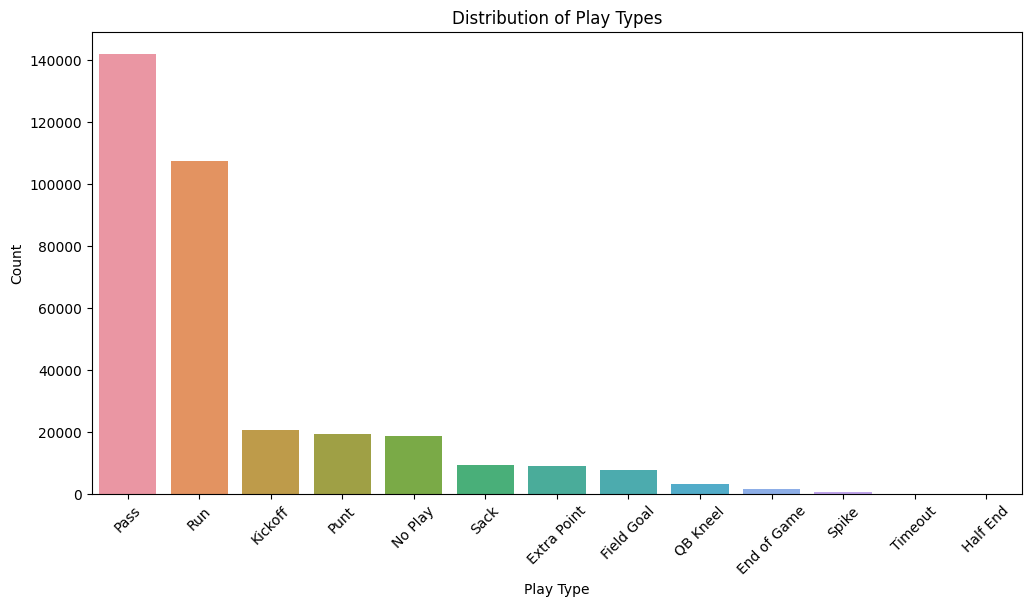

In [14]:
# Visualization 1: Play Type Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='PlayType', data=data, order=data['PlayType'].value_counts().index)
plt.title('Distribution of Play Types')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

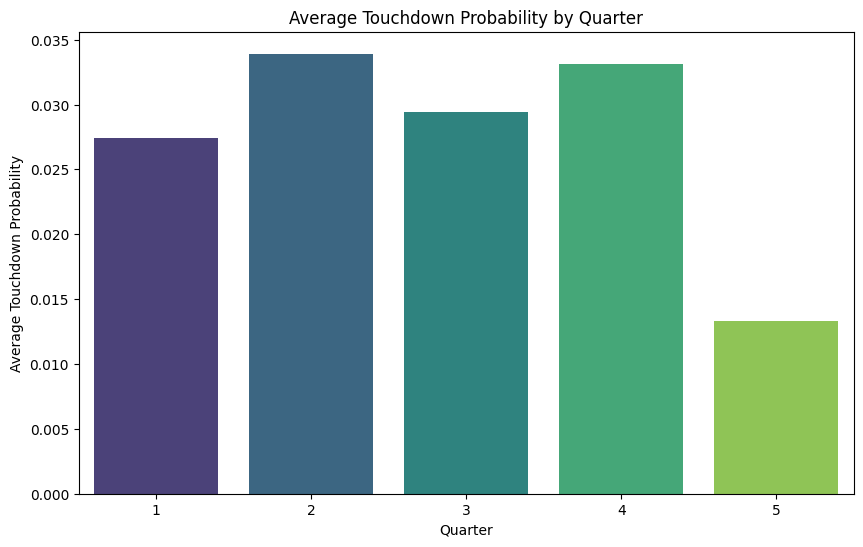

In [15]:
plt.figure(figsize=(10, 6))
quarter_touchdown_prob = data.groupby('qtr')['Touchdown'].mean().reset_index()
sns.barplot(x='qtr', y='Touchdown', data=quarter_touchdown_prob, palette='viridis')
plt.title('Average Touchdown Probability by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Touchdown Probability')
plt.show()

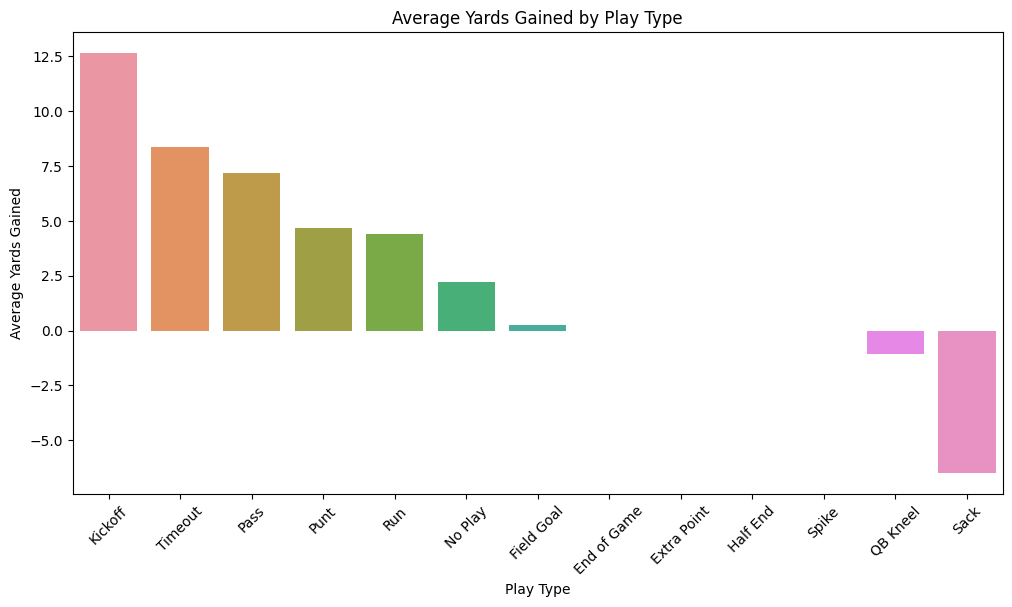

In [16]:
# Bar Chart: Relationship between PlayType and average Yards.Gained
plt.figure(figsize=(12, 6))
playtype_yards = data.groupby('PlayType')['Yards.Gained'].mean().reset_index()
sns.barplot(x='PlayType', y='Yards.Gained', data=playtype_yards, order=playtype_yards.sort_values('Yards.Gained', ascending=False)['PlayType'])
plt.title('Average Yards Gained by Play Type')
plt.xlabel('Play Type')
plt.ylabel('Average Yards Gained')
plt.xticks(rotation=45)
plt.show()

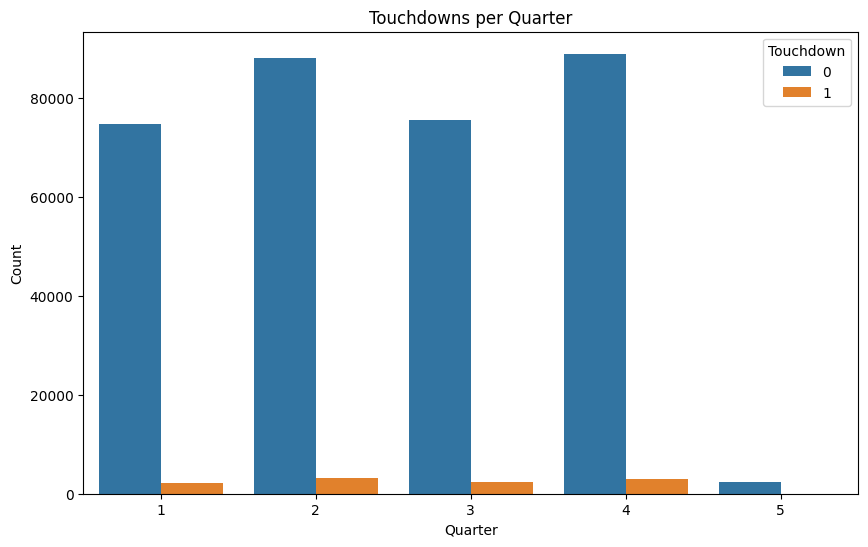

In [17]:
# Visualization 2: Quarterly Touchdowns
plt.figure(figsize=(10, 6))
sns.countplot(x='qtr', hue='Touchdown', data=data)
plt.title('Touchdowns per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.legend(title='Touchdown', loc='upper right')
plt.show()

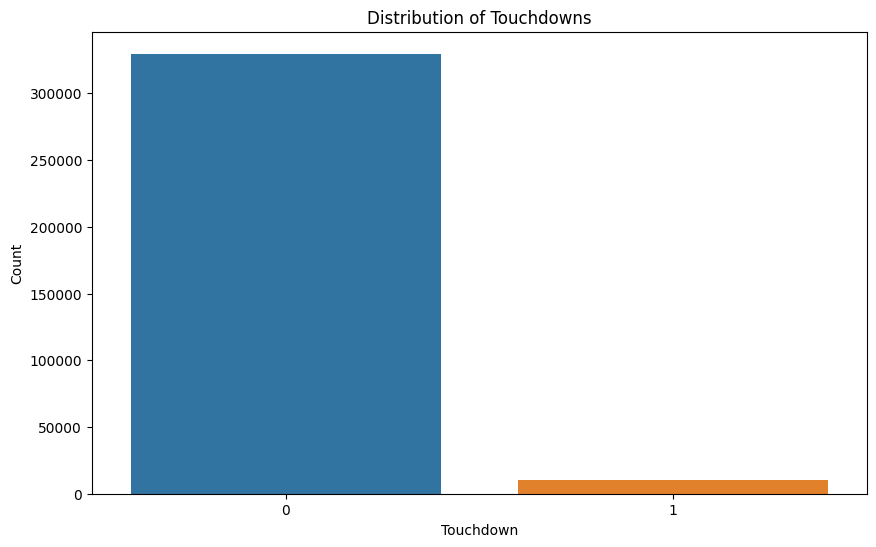

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Touchdown', data=data)
plt.title('Distribution of Touchdowns')
plt.xlabel('Touchdown')
plt.ylabel('Count')
plt.show()


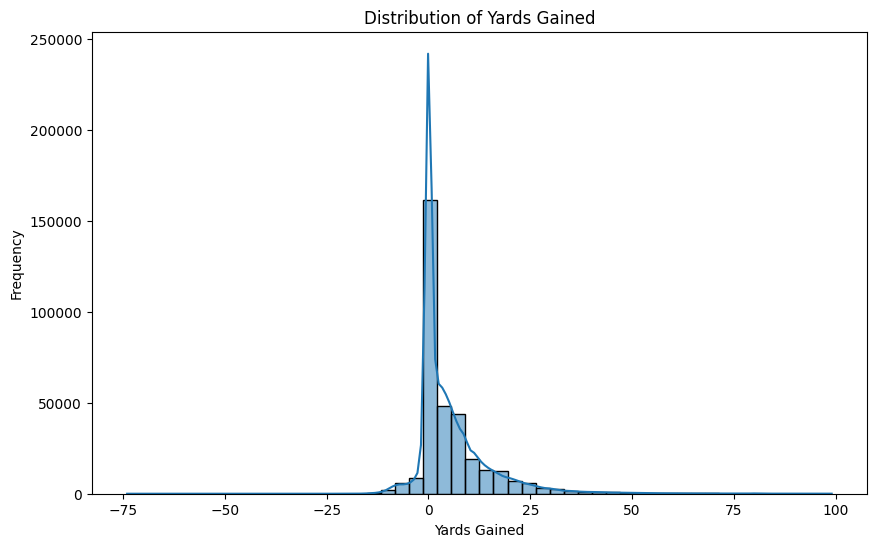

In [19]:
# Visualization 3: Yards Gained Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Yards.Gained'], bins=50, kde=True)
plt.title('Distribution of Yards Gained')
plt.xlabel('Yards Gained')
plt.ylabel('Frequency')
plt.show()

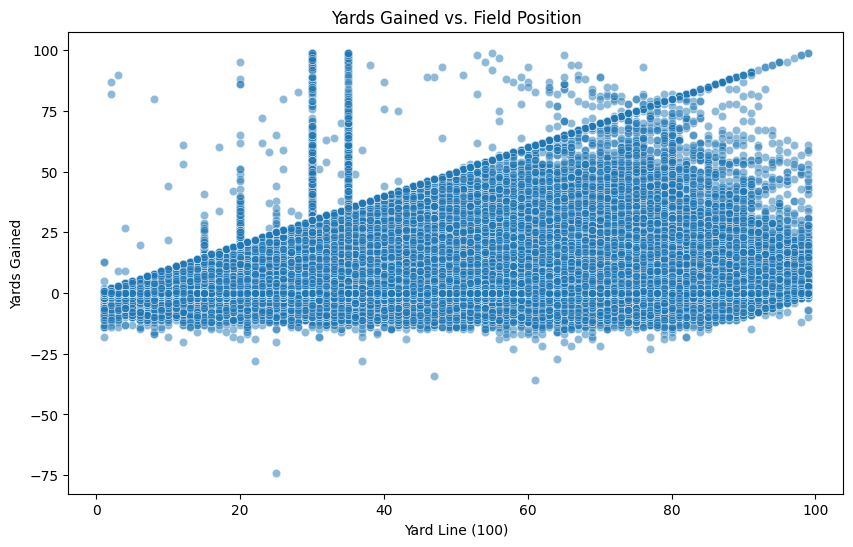

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yrdline100', y='Yards.Gained', data=data, alpha=0.5)
plt.title('Yards Gained vs. Field Position')
plt.xlabel('Yard Line (100)')
plt.ylabel('Yards Gained')
plt.show()

# ***Model building***

In [21]:
features = ['TimeSecs', 'yrdline100', 'ydstogo', 'PosTeamScore', 'DefTeamScore', 'ScoreDiff', 'Yards.Gained', 'Win_Prob']
X = data[features]
y = data['Touchdown']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98960
           1       0.92      0.87      0.89      3122

    accuracy                           0.99    102082
   macro avg       0.96      0.93      0.94    102082
weighted avg       0.99      0.99      0.99    102082

Confusion Matrix:
[[98727   233]
 [  415  2707]]
